In [1]:
# 1.Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Inline plots
%matplotlib inline

# Set style
sns.set(style='whitegrid')

# 2. Load data
df = pd.read_csv('../data/airbnb.csv')  # Adjust the path as necessary
df.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [3]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

## Price Distribution

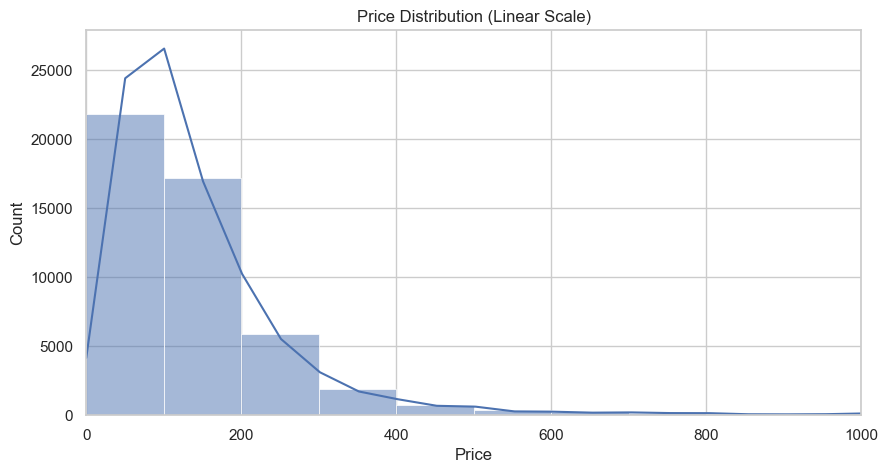

In [4]:
# Linear scale
plt.figure(figsize=(10, 5))
sns.histplot(df['price'], bins=100, kde=True)
plt.title("Price Distribution (Linear Scale)")
plt.xlabel("Price")
plt.ylabel("Count")
plt.xlim(0, 1000)  # limit to remove extreme outliers
plt.show()

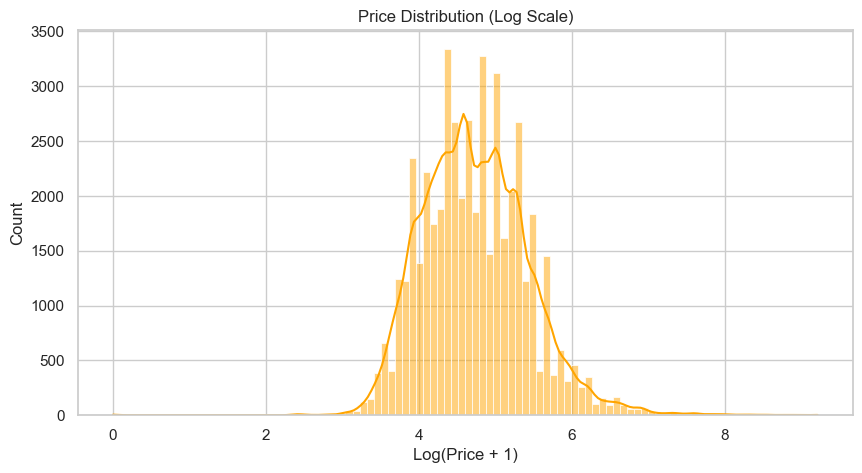

In [5]:
# Log scale
plt.figure(figsize=(10, 5))
sns.histplot(np.log1p(df['price']), bins=100, kde=True, color='orange')
plt.title("Price Distribution (Log Scale)")
plt.xlabel("Log(Price + 1)")
plt.ylabel("Count")
plt.show()

##  Room Type vs Price

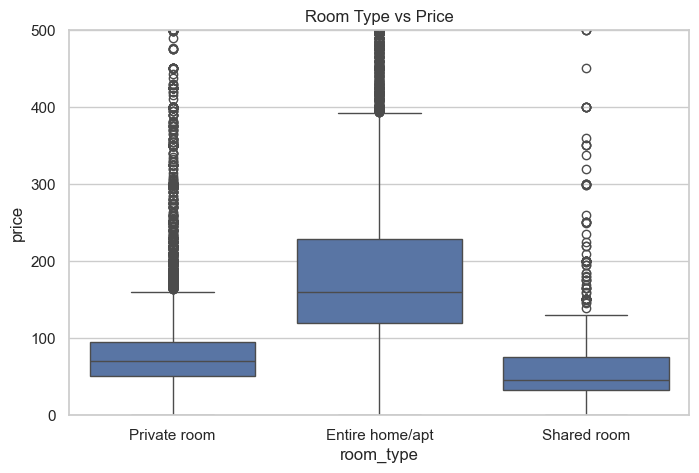

In [6]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='room_type', y='price', data=df)
plt.title("Room Type vs Price")
plt.ylim(0, 500)
plt.show()


## Neighbourhood Group vs Price

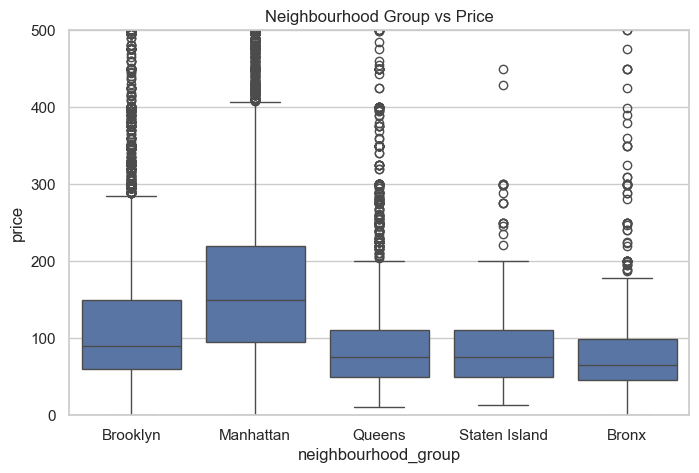

In [7]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='neighbourhood_group', y='price', data=df)
plt.title("Neighbourhood Group vs Price")
plt.ylim(0, 500)
plt.show()


## Correlation Heatmap (Numerical Features)

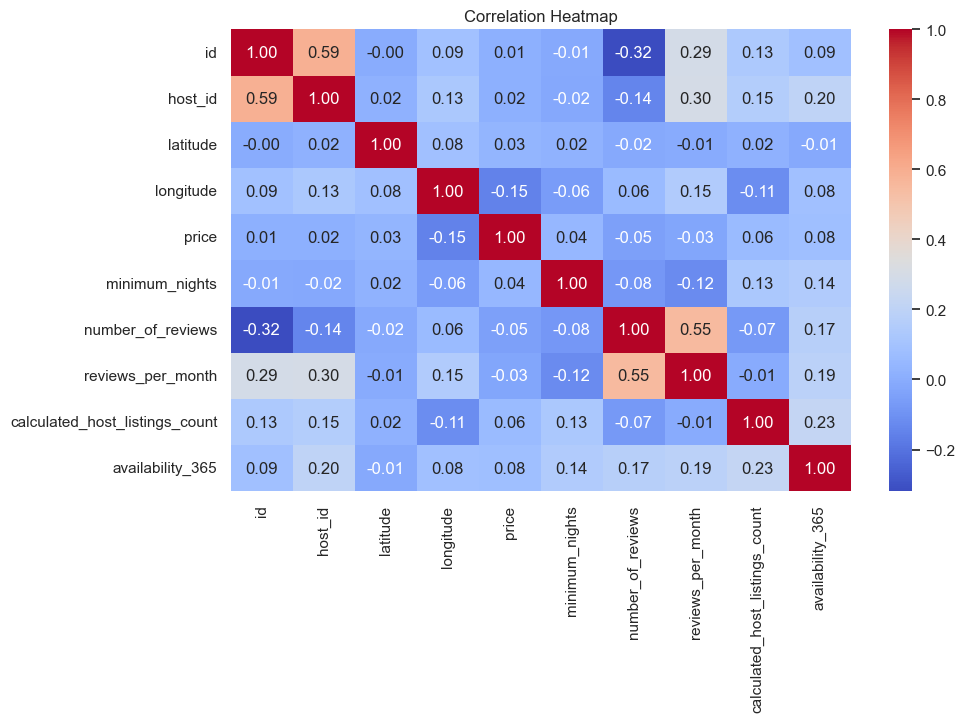

In [8]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

## Availability vs Price

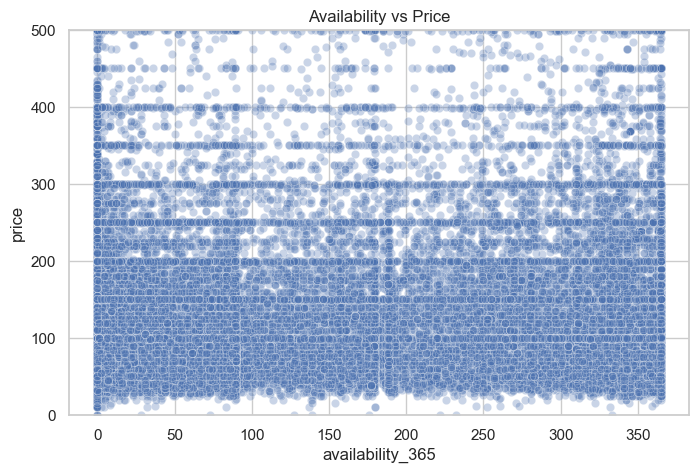

In [9]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='availability_365', y='price', data=df, alpha=0.3)
plt.title("Availability vs Price")
plt.ylim(0, 500)
plt.show()


## Reviews per Month vs Price

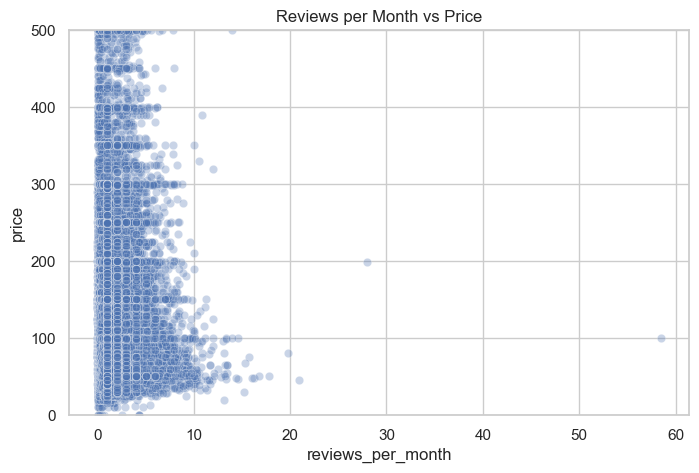

In [10]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='reviews_per_month', y='price', data=df, alpha=0.3)
plt.title("Reviews per Month vs Price")
plt.ylim(0, 500)
plt.show()